Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/spam.csv
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/configurations/config_default
/content/.config/logs/2022.10.28/13.35.23.262379.log
/content/.config/logs/2022.10.28/13.37.01.262813.log
/content/.config/logs/2022.10.28/13.36.19.156679.log
/content/.config/logs/2022.10.28/13.37.00.362876.log
/content/.config/logs/2022.10.28/13.35.53.106765.log
/content/.config/logs/2022.10.28/13.36.34.707746.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the .csv dataset

In [3]:
data=pd.read_csv("../content/spam.csv",encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Drop the unnamed Columns

In [5]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

Renaming Column names sensible

In [6]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [7]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Check for null values in dataset

In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Creating a new Field to store the Message Lengths

In [15]:
data["Message Length"]=data["Message"].apply(len)

Histogram Inference of Message Lengths of Spam and Non-spam messages

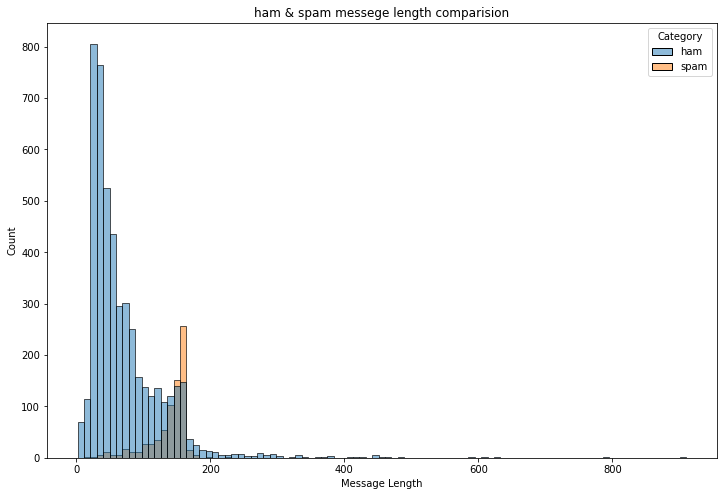

In [16]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [17]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [18]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


Visualizing count of messages of Spam and Non Spam

In [19]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

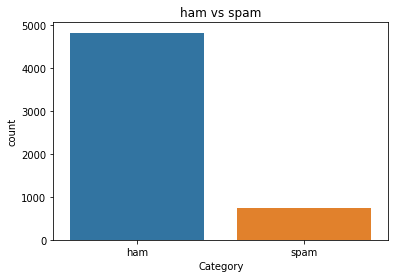

In [20]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [21]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


Undersampling to Genralize Model and Balance Spam and Ham quantities in dataset

In [26]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)
df=df.reset_index()
df=df.drop(
    columns=["index"],
)

In [27]:
df.shape

(1494, 3)

In [28]:
df["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

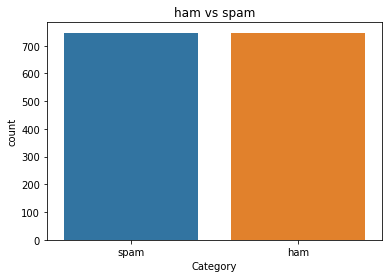

In [29]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [30]:
df.head()

,Category,Message,Message Length
0,spam,lyricalladie(21/F) is inviting you to be her f...,137
1,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...,150
2,ham,"Cool, text me when you're ready",31
3,spam,Had your contract mobile 11 Mnths? Latest Moto...,159
4,spam,U can WIN å£100 of Music Gift Vouchers every w...,160


Binary Encoding of Spam and Ham Categories

In [31]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [32]:
df.head()

,Category,Message,Message Length,Label
0,spam,lyricalladie(21/F) is inviting you to be her f...,137,1
1,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...,150,1
2,ham,"Cool, text me when you're ready",31,0
3,spam,Had your contract mobile 11 Mnths? Latest Moto...,159,1
4,spam,U can WIN å£100 of Music Gift Vouchers every w...,160,1


Import Necessary Libraries to perform Word Tokenization

In [33]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
corpus=[]
for message in df["Message"]:
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    message=" ".join(message)
    corpus.append(message)

Perform One Hot on Corpus

In [35]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [36]:
df["Message Length"].describe()

count    1494.000000
mean      105.732932
std        57.779047
min         2.000000
25%        49.000000
50%       118.500000
75%       153.000000
max       632.000000
Name: Message Length, dtype: float64

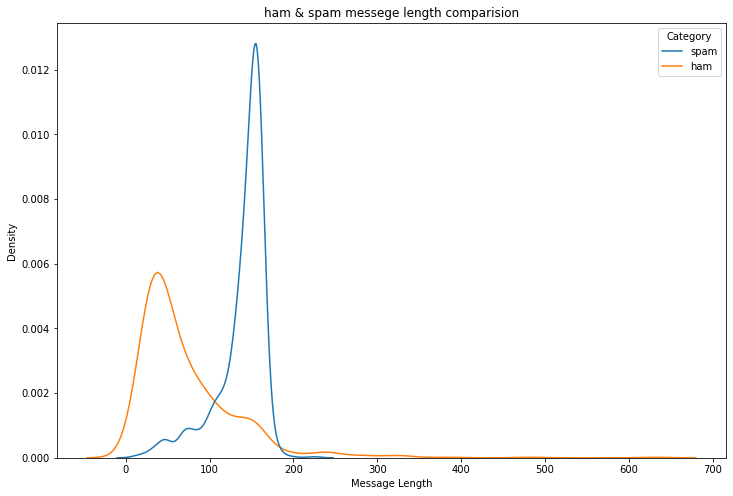

In [37]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [39]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [40]:
df_final=pd.concat([extract_features,target],axis=1)

In [41]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,5291,9789,3879,6328,4698,489,2395,489,8849,1
1,0,0,0,0,0,0,0,0,0,0,...,6935,2324,5438,8691,2814,7648,4824,7648,5183,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3988,6242,3117,0
3,0,0,0,0,0,0,0,0,0,0,...,9269,6242,8691,6737,6242,2454,1608,8391,807,1
4,0,0,0,0,0,0,0,0,0,0,...,1617,2674,5291,1352,4528,2578,1162,6254,5776,1


Splitting Dependent and Independent Variables

In [42]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

Train, test and Validation Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)

Building a Sequential Model

In [45]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [46]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [47]:
model=Sequential()

In [48]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Model Fitting

In [50]:
history=model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 15s 365ms/step - loss: 0.5047 - accuracy: 0.7449 - val_loss: 0.2800 - val_accuracy: 0.9215
Epoch 2/10
34/34 [==============================] - 12s 343ms/step - loss: 0.1786 - accuracy: 0.9471 - val_loss: 0.0983 - val_accuracy: 0.9686
Epoch 3/10
34/34 [==============================] - 12s 347ms/step - loss: 0.0776 - accuracy: 0.9787 - val_loss: 0.0822 - val_accuracy: 0.9791
Epoch 4/10
34/34 [==============================] - 12s 346ms/step - loss: 0.0339 - accuracy: 0.9926 - val_loss: 0.0962 - val_accuracy: 0.9738
Epoch 5/10
34/34 [==============================] - 12s 343ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.1085 - val_accuracy: 0.9791
Epoch 6/10
34/34 [==============================] - 12s 345ms/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.1191 - val_accuracy: 0.9738
Epoch 7/10
34/34 [==============================] - 12s 347ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.1312 - val_accuracy: 0.9686

In [51]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graph_acc(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

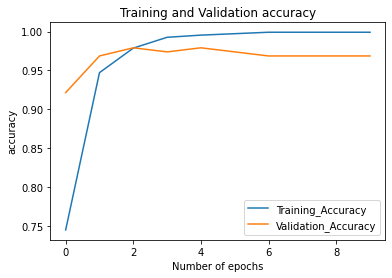

In [52]:
plot_graph_acc('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [53]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 3s 183ms/step


In [54]:
model.save('Spam_SMS_classifier.h5')

Evaluating the Model

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:95.11%


array([[ 98,   6],
       [  5, 116]])

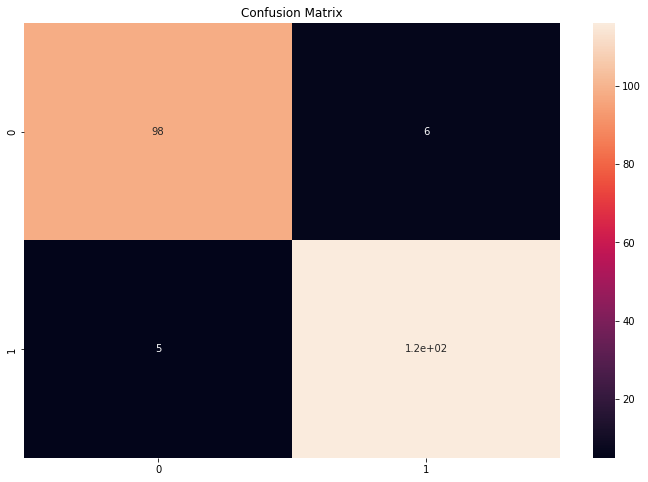

In [57]:
cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

Function to Test the Model on a Random message

In [58]:
def classify_message(model,message):
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        for sentence in sentences:
            words=re.sub("[^a-zA-Z]"," ",sentence)
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)        
    oneHot=[one_hot(word,n=vocab_size)]
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    predict=model.predict(text)
    if predict>0.5:
        print("It is a spam")
        print("predict score: ", predict[0][0])
    else:
        print("It is not a spam")
        print("predict score: ", predict[0][0])

In [60]:
message1="I am having my Tests right now. Will call back as soon as possible! Till then be safe wherever you are. Be Alert of any hazard"
message2="Your Rs.8850 welcome bonus is ready to be credited. Download Junglee Rummy now. Claim Bonus on your first deposit prize pool"

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
classify_message(model,message1)

1/1 [==============================] - 0s 42ms/step
It is a spam
predict score:  0.80537426


In [63]:
classify_message(model,message2)

1/1 [==============================] - 0s 29ms/step
It is a spam
predict score:  0.99855196
